In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import math
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [2]:
 fa = lambda a: a
fu0 = lambda h, i: 1
u_x0 = lambda x: 0

In [3]:
def sch(t, h, left, right, k, a, eps):
    tsize = 1 + int(1 / t)  
    hsize = k 
    x = np.linspace(left, right, k)
    u = np.zeros((tsize, hsize))
    u0 = np.array([u_x0(i) for i in np.linspace(left, right, k)])
    l=r=0
    for i in range(0, k-1):
        if(x[i] == 0.0):
            l=i
        if(x[i] == 1.0):
            r=i          
    for i in range(l, r): 
        u[0][i] = fu0(h, i)  
    for i in range(tsize-1):
        for j in range(1,hsize-1):
            if(a>=0):
                u[i+1, j]=u[i, j]-a*t*(u[i, j]-u[i, j-1])/h+t*eps*(u[i,j+1]-2*u[i,j]+u[i,j-1])/h**2
            elif(a<0):
                u[i+1, j]=u[i, j]-a*t*(u[i, j+1]-u[i, j])/h+t*eps*(u[i,j+1]-2*u[i,j]+u[i,j-1])/h**2
    return u

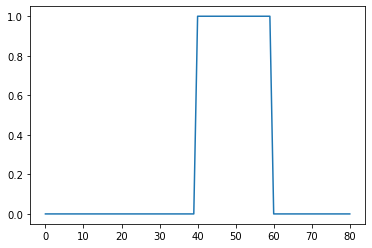

In [42]:
h = 0.05
t = 0.005
left = -2
right = 2
k = int((right-left)/h) + 1
a = 1
eps=0.01

u_sch = sch(t, h, left, right, k, a, eps)
plt.plot(u_sch[0])

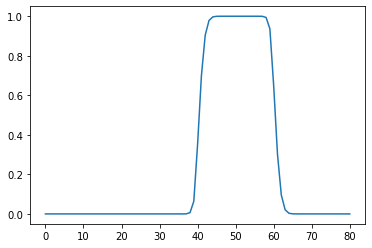

In [43]:
plt.plot(u_sch[10])

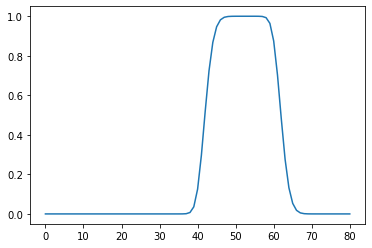

In [44]:
plt.plot(u_sch[25])

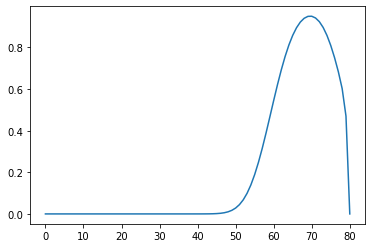

In [45]:
plt.plot(u_sch[-1])

In [23]:
def sch_u(t, h, left, right, k, a, eps):
    tsize = 1 + int(1 / t)  
    hsize = k 
    x = np.linspace(left, right, k)
    u = np.zeros((tsize, hsize))
    u0 = np.array([u_x0(i) for i in np.linspace(left, right, k)])
    l=r=0
    for i in range(0, k-1):
        if(x[i] == 0.0):
            l=i
        if(x[i] == 1.0):
            r=i          
    for i in range(l, r):
 ##   for i in range(l, k):
##    for i in range(0, r):
        u[0][i] = fu0(h, i)
    aa=np.zeros((1,hsize))    
    for i in range(0,tsize-1):
        aa=u[i,:]*a
        for j in range(1,hsize-1):
            if (u[i,j-1]-u[i,j]>0.4):
                aa[j] = a
            u[i+1,j] = u[i,j]-t*(aa[j]+np.abs(aa[j]))*(u[i,j]-u[i,j-1])/(h)-t*(aa[j]-np.abs(aa[j]))*(u[i,j+1]-u[i,j])/(h)+t*eps*(u[i,j+1]-2*u[i,j]+u[i,j-1])/h**2
                
     ##       if(aa[j]>=0):
     ##           u[i+1, j]=u[i, j]-aa[j]*t*(u[i, j]-u[i, j-1])/h
     ##       elif(aa[j]<0):
     ##           u[i+1, j]=u[i, j]-aa[j]*t*(u[i, j+1]-u[i, j])/h   
 ##   for n in range(K):
  ##      for j in range(1,N):
  ##          if (y[j-1,n]-y[j,n]>0.4):
   ##             a = 1
   ##         else:
   ##             a = y[j+1,n]
   ##         y[j,n+1] = y[j,n]-a*tau*(y[j,n]-y[j-1,n])/h
    ##        if (y[j-1,n]-y[j,n]>0.4):
  ##              a = 1          
    ##        y[j,n+1] = y[j,n]-tau*(a+np.abs(a))*(y[j,n]-y[j-1,n])/(2*h)-tau*(a-np.abs(a))*(y[j+1,n]-y[j,n])/(2*h)
    
    return u

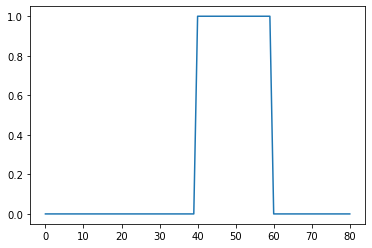

In [29]:
h = 0.05#0.05
t = 0.005#0.005
left = -2
right = 2
k = int((right-left)/h) + 1
a = 1
eps = 0.01

u_sch = sch_u(t, h, left, right, k, a, eps)
plt.plot(u_sch[0])

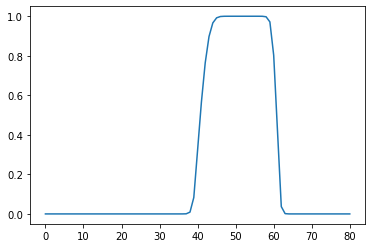

In [30]:
plt.plot(u_sch[10])

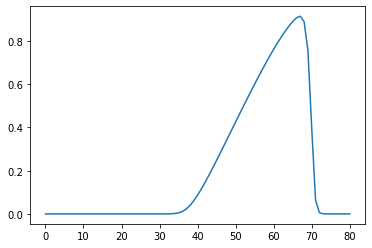

In [31]:
plt.plot(u_sch[120])

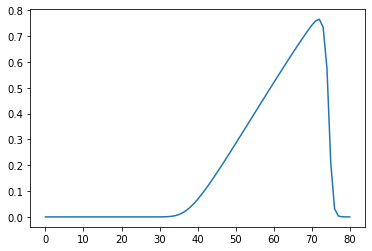

In [32]:
plt.plot(u_sch[190])

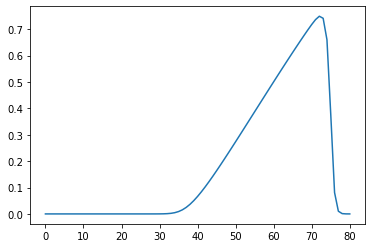

In [33]:
plt.plot(u_sch[198])